<a href="https://colab.research.google.com/github/mugalan/Learning-Material/blob/main/Simulation_of_a_Bead_on_a_Hoop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting up Python 

In [ ]:
import math
import numpy as np
from numpy import linalg
from scipy.integrate import odeint
import plotly.graph_objects as go

from sympy import symbols
from sympy import *

from sympy.physics.mechanics import dynamicsymbols, init_vprinting

In [ ]:
class mugas_dynamic_systems_simulation_functions:
  
  def __init__(self): 
    self=[];

  def simulateDySystem(self, dynamicSystemModel, Tmax, dT, X0, sysPara, figTitle, xLabel, yLabel):
    t = np.linspace(0, Tmax, int(Tmax/dT+1))
    sol = odeint(dynamicSystemModel, X0, t, args=(sysPara,));
    self.soln=sol;
    fig = go.Figure()
    [nt,nS]=sol.shape;

    # Add traces
    for nn in range(nS):
      fig.add_trace(go.Scatter(x=t, y=sol[:,nn], mode='lines+markers', name='x'+str(nn+1)))
      fig.update_layout(title=figTitle, xaxis=dict(title=xLabel),yaxis=dict(title=yLabel))
    
    fig.show()
    return [t,sol,fig] 

  def animate_particle_motion(self, XX, axisRange, figTitle):
    xx=[jj[0] for jj in XX]
    yy=[jj[1] for jj in XX]
    zz=[jj[2] for jj in XX]

    fig = go.Figure(
        data=[go.Scatter3d(x=[xx[0]], y=[yy[0]],z=[zz[0]],
                        mode="markers",
                        marker=dict(color="red", size=10)),
              go.Scatter3d(x=xx, y=yy,z=zz, name='Path',
                        mode="lines",
                        line=dict(color="blue", width=2))],
        
        layout=go.Layout(
            scene = dict(
                        xaxis=dict(range=axisRange[0], autorange=False),
                        yaxis=dict(range=axisRange[1], autorange=False),
                        zaxis=dict(range=axisRange[2], autorange=False),
                        aspectratio=dict(x=1, y=1, z=1),
            ),
            title_text=figTitle, hovermode="closest",
            updatemenus=[dict(type="buttons",
                              buttons=[dict(label="Play",
                                            method="animate",
                                            args=[None, {"frame": {"duration": 10},"mode": "immediate","fromcurrent": True, "transition": {"duration": 10, "easing": "linear"},}]
                                            )])]),
        frames=[go.Frame(
            data=[go.Scatter3d(
                x=[p[0]],
                y=[p[1]],
                z=[p[2]],
                name='Particle',
                mode="markers",
                marker=dict(color="red", size=10))])

            for p in XX]
    )

    fig.show()
    return fig

In [ ]:
md=mugas_dynamic_systems_simulation_functions()

# Problem Statement

Consider a bead of mass $m$ constrained to move as shown in the figure below. The orthonormal frame $\mathbf{e}$ is an earth fixed frame with origin at the centre of the disk. The orthonormal frame $\mathbf{c}$ is fixed to the disk. The disk is rotating about a vertical axis (that is about the $\mathbf{e}_3$ axis) and about an axis through its centre that is perpendicular to the disk (that is about the $\mathbf{c}_1$ axis). 

Let the radius of the disk be denoted by $r$, the thickness by $h$, the length of the slot by $2l$, the width of the slot by $2b$, and the density of the material by $\rho$.

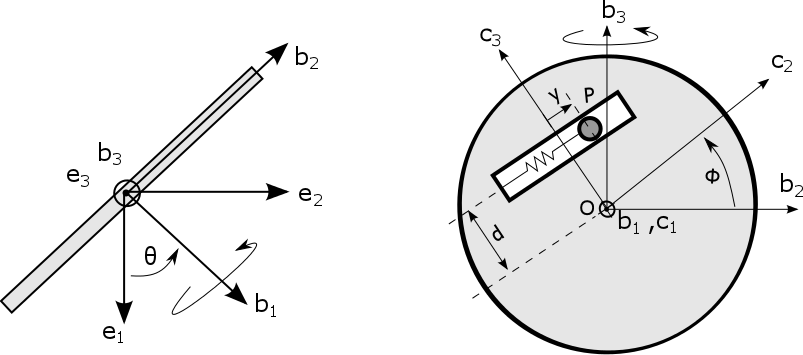

# Equations of Motion

### Configuration and Angular Velocity

\begin{align}
\mathbf{b}&=\mathbf{e}\underbrace{\begin{bmatrix} \cos{\theta} &-\sin{\theta} &0\\
\sin{\theta} & \cos{\theta} & 0\\
0 & 0 & 1
\end{bmatrix}}_{R_3(\theta)}\\
\mathbf{c}&=\mathbf{b}\underbrace{\begin{bmatrix} 1 & 0 & 0\\0 & \cos{\phi} &-\sin{\phi}\\
0 & \sin{\phi} & \cos{\phi}
\end{bmatrix}}_{R_1(\phi)}
\end{align}
Thus 
\begin{align}
\mathbf{c}&=\mathbf{b}R_1=\mathbf{e}\underbrace{R_3R_1}_{R}
\end{align}

Thus the angular velcoty is given by
\begin{align}
\widehat{\Omega}&=R^T\dot{R}=\widehat{\Omega}_1+R_1^T\widehat{\Omega}_3R_1
\end{align}
and hence
\begin{align}
{\Omega}&={\Omega}_1+R_1^T{\Omega}_3=\begin{bmatrix}\dot{\phi} \\ \dot{\theta}\sin{\phi} \\ \dot{\theta}\cos{\phi}
\end{bmatrix}
\end{align}

We consider the system as a coupled system. The bead and the disk. Below we will write down the Newton's equations for the two systems seperately.


### Newton's Equations of Motion for the Bead

Let the position of the center of mass of the bead be denoted by
\begin{align}
OP=\mathbf{e}\bar{x}_p=\mathbf{c}\underbrace{\begin{bmatrix} 0\\ y\\d
\end{bmatrix}}_{\bar{X}_p}=\mathbf{e}\,{R_3(\theta)R_1(\phi)}\,\bar{X}_p.
\end{align}

Assuming that the bead is a small spherical object of total mass $m$ we see that its center of mass motion is described in the $\mathbf{b}$ frame by the equations
\begin{align}
m\,R\left(\widehat{\Omega}^2\bar{X}_p +\widehat{\Omega}\dot{\bar{X}}_p+\dot{\widehat{\Omega}}\bar{X}_p+\ddot{\bar{X}}_p\right)&=  R F^e_p
\end{align}
Where $F^e$ is the representation of the external forces acting on the bead expressed in the moving $\mathbf{b}$ frame that is explicitly given by
\begin{align}
\mathbf{c}F^e_p=\mathbf{c}\underbrace{\begin{bmatrix} N_1\\ -ky\\N_3
\end{bmatrix}}_{F_b}+\mathbf{b}\underbrace{\begin{bmatrix} 0\\ 0\\-mg
\end{bmatrix}}_{f_g}=\mathbf{c}\underbrace{\begin{bmatrix} N_1\\ -ky\\N_3
\end{bmatrix}}_{F_b}+\mathbf{c}R_1^T(\phi)\underbrace{\begin{bmatrix} 0\\ 0\\-mg
\end{bmatrix}}_{f_g}
\end{align}

### Equations of motion for the disk

We see that in a moving frame $\mathbf{b}$ with the origin fixed with respect to the inertial frame $\mathbf{e}$  
\begin{align}
p&=M\dot{\bar{x}}_D=MR(\Omega\times \bar{X}_D),\\
\pi &=R\mathbb{I}_D\Omega,
\end{align}
where $\bar{X}_D$ is the representation of the center of mass of the disk in the  moving frame $\mathbf{b}$ and $\mathbb{I}_D$ is the moment of inertia tensor of the disk with respect to the disk fixed frame $\mathbf{b}$.

\begin{align}
p&=M_D\,R\widehat{\Omega}\bar{X}=M_D\dot{\bar{x}},\\
\pi&= R\mathbb{I}\Omega
\end{align}
and their derivatives are
\begin{align}
\dot{p}&=M_D\,R\left(\widehat{\Omega}^2\bar{X}_D +\dot{\widehat{\Omega}}\bar{X}\right)=  R F^e_D=f^e_D,\\
\dot{\pi}&=R\left(\mathbb{I}_D\dot{\Omega}-\mathbb{I}_D{\Omega}\times \Omega\right)=RT^e_D=\tau^e_D.
\end{align}
We see that the resultant of the external forces acting on the disk are given by

\begin{align}
\mathbf{c}F^e_D=\mathbf{c}\underbrace{\begin{bmatrix} -N_1\\ 0\\-N_3
\end{bmatrix}}_{F_{b_1}}+\mathbf{c}\underbrace{\begin{bmatrix} N_{c1}\\ N_{c2}\\N_{c3}
\end{bmatrix}}_{F_{b_2}}+\mathbf{c}\underbrace{\begin{bmatrix} 0\\ ky\\0
\end{bmatrix}}_{F_{b_3}}+\mathbf{c}R_1^T(\phi)\underbrace{\begin{bmatrix} 0\\ 0\\-M_Dg
\end{bmatrix}}_{f_g}
\end{align}
and the reultant moments about the pivot point are given by
\begin{align}
T^e_D&=\begin{bmatrix} 0\\ y\\d
\end{bmatrix}\times \begin{bmatrix} -N_1\\ 0\\-N_3
\end{bmatrix}+\begin{bmatrix} 0\\ 0\\0
\end{bmatrix}\times \begin{bmatrix} N_{c1}\\ N_{c2}\\N_{c3}
\end{bmatrix}+\begin{bmatrix} 0\\ -l\\d
\end{bmatrix}\times\begin{bmatrix} 0\\ ky\\0
\end{bmatrix}+
\bar{X}_D\times R_1^T(\phi)\begin{bmatrix} 0\\ 0\\-M_Dg
\end{bmatrix}+\begin{bmatrix} 0\\ T_2\\T_3
\end{bmatrix}
\end{align}

### Rotational Constraint

From the configuration of the system we also see that the external moments about the disk around the $\mathbf{e}_3=\mathbf{b}_3$ axis is zero. Thus we also have the relationship:
\begin{align}
\begin{bmatrix}0\\0\\1\end{bmatrix}\cdot R_1(\phi)T^e_d=0
\end{align}

#Python function to compute the moment of inertia of a general slotted disk about its center of mass.
 

In [ ]:
def inertia_slotted_disk():
  m, M, r, h, l, b, d, rho=symbols('m, M, r, h, l, b, d, rho')
  hatd=np.array([[0,-d,0],[d,0,0],[0,0,0]]);
  M_1=rho*np.pi*r**2*h;
  M_2=4*rho*l*b*h
  M=M_1-M_2;
  barX=-(M_2/M)*Matrix([0,0,-d]);
  hatXbar=-(M_2/M)*Matrix([[0,-d,0],[d,0,0],[0,0,0]]);
  Ic1=Matrix([[M_1*r**2/2,0,0],[0,M_1*(3*r**2+h**2)/12,0],[0,0,M_1*(3*r**2+h**2)/12]])
  Ic2=Matrix([[M_2*(4*b**2+4*l**2)/12,0,0],[0,M_2*(4*b**2+h**2)/12,0],[0,0,M_2*(h**2+4*l**2)/12]])
  II=Ic1-Ic2+M_2*hatd@hatd*2;
  IIc=II+M*hatXbar@hatXbar;
  return [M,barX,II,IIc]

# Simulations

In [ ]:
def beadInDiskSystemModel(X, t, parameters):
  y=X[0]; dy=X[1]; phi=X[2]; dphi=X[3]; theta=X[4]; dtheta=X[5]
  [M,barX,I,Ic]=inertia_slotted_disk();
  II=I.subs(parameters);
  II_1=II[0,0]; II_2=II[1,1]; II_3=II[2,2];
  M=parameters['M']; m=parameters['m']; l=parameters['l']; k=parameters['k']; d=parameters['d']; g=parameters['g'];
  ddphi=(-g*(M*l*d*np.sin(phi)+m*y*np.cos(phi))-k*d*y+0.5*(II_2-II_3)*np.sin(2*phi)*dtheta**2+m*d*y*((np.sin(phi))**2*dtheta**2+dphi**2)-0.5*m*y**2*np.sin(2*phi)*dtheta**2-2*m*y*dphi*dy)/(II_1+m*y**2);
  ddtheta=(II_3-II_2)*np.sin(2*phi)*dphi*dtheta/(II_2*(np.sin(phi))**2+II_3*(np.cos(phi))**2);
  ddy=-m*g*np.sin(phi)-k*y+m*y*((np.sin(phi))**2*dtheta**2+dphi**2)-0.5*m*d*np.sin(2*phi)*dtheta**2+m*ddphi;

  dXdt=[dy, ddy.subs(parameters), dphi, ddphi.subs(parameters), dtheta, ddtheta.subs(parameters)];
  return dXdt

In [ ]:
parameters={'rho':2710, 'r':0.1, 'h':0.01, 'd':0.05, 'b':0.005, 'l':0.04, 'g':10, 'k':4, 'm':0.01, 'M':1}
[t,sol,fig]=md.simulateDySystem(beadInDiskSystemModel, 10,0.05, [1.5,0,0,0.2,0,0.2], parameters, 'y(t) and \dot{y}(t) Vs t', 'Time / t', 'x')

In [ ]:
XX=np.zeros((len(t),3));
for i,tt in enumerate(t):
  y=sol[i][0]; phi=sol[i][2]; theta=sol[i][4];
  R3=np.array([[np.cos(theta), -np.sin(theta),0],[np.sin(theta), np.cos(theta),0],[0,0,1]])
  R1=np.array([[1,0,0],[0, np.cos(phi), -np.sin(phi)],[0,np.sin(phi),-np.cos(phi)]])
  R=R3 @ R1;
  XX[i,:]=R @ [0,y,parameters['d']];

In [ ]:
fig=md.animate_particle_motion(XX,[[-2,2],[-2,2],[-2,2]],'Motion in the e-frame')